# Downloading all filings in 2021 from the US Securities and Exchange Commission EDGAR

In [2]:
import pandas as pd
import datetime as dt
import io
import requests
import time

base_url = "https://www.sec.gov/Archives/edgar/full-index/2021/"
filings_name = "/master.idx"
number_of_quarters = 4
filings_start_pos = 11

HEADER = {'Host': 'www.sec.gov', 'Connection': 'close',
         'Accept': 'application/json, text/javascript, */*; q=0.01', 'X-Requested-With': 'XMLHttpRequest',
         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36',
         }
NO_HEADER = {}

def downloader(url, type = None, f_name = None, f_log = None, number_of_tries = 5, sleep_time = 5, header_type = HEADER):
    # type = 1:to file, 2: to string, 3: to list
    print(".....Downloading started for {}......".format(url))
    for i in range(1, number_of_tries):
        try:
            response = requests.get(url, headers = header_type)
            if response.status_code == 200:
                if type == 1:
                    with open(f_name, 'wb') as f:
                        f.write(response.content)
                        print("=====Downloaded completely for {}=====\n".format(url))
                    return True
                elif type == 2:
                    doc = response.content.decode(encoding="UTF-8", errors = 'ignore' )
                    print("=====Download complete for {}=====\n".format(url))
                    return doc
                elif type == 3:
                    file_list = io.StringIO(response.content.decode(encoding = "UTF-8", errors = 'ignore' )).readlines()
                    print("=====Downloaded completely for {}=====\n".format(url))
                    
                    return file_list
                
            else:
                print(f'  Error in try #{i} downloader : URL = {url} | status_code = {response.status_code}')
                if i == number_of_tries + 1:
                    print(f'  Failed download: URL = {url}')
                    if f_log: f_log.write(f'  Failed download: URL = {url}\n')
                
        except Exception as exc:
            if i == 1:
                print('\n==>response error in downloader')
            print(f'  {i}.url  : {url} \n  exc:  {exc}')
            if '404' in str(exc):
                break
            print(f'     Retry in {sleep_time} seconds')
            time.sleep(sleep_time)
            sleep_time += sleep_time

    print('\n  ERROR:  Download failed for')
    print(f'          url:  {url}')
    
    if f_log:
        f_log.write('\nERROR:  Download failed=>')
        f_log.write(f'  _url: {url}')
        f_log.write(f'  |  {dt.datetime.now().strftime("%c")}')

    return False

def download_to_list(url, f_log = None, number_of_tries = 5, sleep_time = 5, header_type = HEADER):
    # Downloading url content to create list of lines
    file_list = downloader(url, type = 3, f_log = f_log, number_of_tries = number_of_tries, sleep_time = sleep_time, header_type = header_type)
    return file_list

def get_master_index_filings_by_download():
    # Downloading and converting Q1, Q2, Q3, Q4 filings into a dataframe
    df_masterindex = pd.DataFrame()
    print("Downloading Master Index Files for 2021")
    for i in range(1,number_of_quarters+1): 
        i_str = str(i)
        url_end_point = base_url + "QTR" + i_str + filings_name
        master_index_list = download_to_list(url_end_point) #
        master_index_list_filing_record = master_index_list[filings_start_pos:]
        df = pd.DataFrame(master_index_list_filing_record)
        df[['cik','company_name','form_type','date_filed','file_name']] = df[0].str.split('|',expand=True)
        df.drop(0, axis = 1, inplace = True)
        df_masterindex = df_masterindex.append(df)
        
    return df_masterindex

# Generate master index filings    
df_masterindex = get_master_index_filings_by_download()

.....Downloading started for https://www.sec.gov/Archives/edgar/full-index/2021/QTR1/master.idx......
=====Downloaded completely for https://www.sec.gov/Archives/edgar/full-index/2021/QTR1/master.idx=====



/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/2301753764.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_masterindex = df_masterindex.append(df)


.....Downloading started for https://www.sec.gov/Archives/edgar/full-index/2021/QTR2/master.idx......
=====Downloaded completely for https://www.sec.gov/Archives/edgar/full-index/2021/QTR2/master.idx=====



/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/2301753764.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_masterindex = df_masterindex.append(df)


.....Downloading started for https://www.sec.gov/Archives/edgar/full-index/2021/QTR3/master.idx......
=====Downloaded completely for https://www.sec.gov/Archives/edgar/full-index/2021/QTR3/master.idx=====



/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/2301753764.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_masterindex = df_masterindex.append(df)


.....Downloading started for https://www.sec.gov/Archives/edgar/full-index/2021/QTR4/master.idx......
=====Downloaded completely for https://www.sec.gov/Archives/edgar/full-index/2021/QTR4/master.idx=====



/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/2301753764.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_masterindex = df_masterindex.append(df)


# Creating a SQL database to store all filings in 2021 from EDGAR

In [3]:
import sqlite3
from sqlite3 import Error

resources_files_path = ""
db_file = resources_files_path + "newdatabase.db"

def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn

def create_table(conn):
    try:
        create_table_sql = """CREATE TABLE IF NOT EXISTS [fillings_2021] (
                                cik          VARCHAR (200),
                            company_name VARCHAR (2000),
                            form_type    VARCHAR (255),
                            date_filed   DATETIME,
                            file_name    VARCHAR (1000)
                        );
                        """
        c = conn.cursor()
        c.execute(create_table_sql)
        print("Table Created")
    except Error as e:
        print(e)
        
def insert_all_records_into_database(conn, data):
    try:
        data.to_sql("filings_2021",conn,if_exists = 'replace',index = False)
        conn.commit()
        print("Data Inserted Successfully ")
    except Error as e:
        print(e)

# Creating database connection 
db_conn = create_connection(db_file)

# Creating a database table
create_table(db_conn)

# Loading data into table
insert_all_records_into_database(db_conn, df_masterindex)


Table Created
Data Inserted Successfully 


# Querying 10-Q filings from the database

In [4]:
qry_form_type = "10-Q"

def select_filings_by_form_type(conn, form_type):
    
    cur = conn.cursor()
    rs = cur.execute("SELECT * FROM fillings_2021 where form_type = '" + form_type + "'")
    cols = list(map(lambda x:x[0],rs.description))
    df = pd.DataFrame(rs.fetchall(),columns = cols)

    return df

# Selecting 10-Q filings from table 
df_10q = select_filings_by_form_type(db_conn,qry_form_type)
df_10q['Date'] = pd.to_datetime(df_10q['date_filed'])
df_10q['cik'] = df_10q["cik"].map(int)
df_10q = df_10q.set_index(['cik'])

# Downloading stock prices of some companies that filed 10-Q forms in 2021 using thier ciks

In [5]:
import yfinance as yf
import numpy as np

sample_cik = ['1800', '1551152', '1652044', '1018724', '320193', '70858', '1067983', '1730168',
              '93410', '858877', '21344', '909832', '59478', '34088', '354950', '200406',
              '19617', '1141391', '63908', '310158', '1326801', '789019', '1045810',
              '77476', '78003', '80424', '1318605', '731766', '1403161', '104169']

all_tickers_url = "https://www.sec.gov/include/ticker.txt"
stockprice_start_date = dt.datetime(2021,1,1)
stockprice_end_date = dt.datetime(2021,12,31)


def get_list_of_all_tickers():
    # Downloading list of all tickers and cik from edgar
    all_tickers_list = download_to_list(all_tickers_url)
    df_alltickers = pd.DataFrame(all_tickers_list)
    df_alltickers = df_alltickers.replace('\s+',';', regex = True) 
    df_alltickers[['ticker','cik','ex']] = df_alltickers[0].str.split(';',expand = True)
    df_alltickers.drop([0,'ex'], axis = 1, inplace = True)
    df_alltickers = df_alltickers.replace(r'\n','', regex = True) 
    df_alltickers['cik'] = df_alltickers['cik'].str.strip()
    df_alltickers['cik'] = df_alltickers["cik"].map(int)
    df_alltickers['ticker'] = df_alltickers['ticker'].str.upper()
    df_alltickers = df_alltickers.set_index('cik')
    
    return df_alltickers

# Defining returns formula
def LogDiff(x):
    x_diff = 100 * np.log(x / x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff

# Defining liquidity formula
def set_liquidity(data):
    data['liquidity'] = (data['Volume'] * data['Adj Close']) / (data['High'] - data['Low'])
    
    return data

# Loading sample 30 companies listed in sample_cik into a dataframe
df_sample_cik = pd.DataFrame(sample_cik, columns = ['cik'])
df_sample_cik['cik'] = df_sample_cik["cik"].map(int)

# Downloading list of tickers from edgar
df_alltickers = get_list_of_all_tickers()

# Joining sample company cik dataframe and tickers dataframe to get tickers of sample companies
df_sample_cik_tickers = df_sample_cik.join(df_alltickers, on = "cik")

# Downloading stock prices using ticker
df_stockprices = pd.DataFrame()
for index, row in df_sample_cik_tickers.iterrows():
    yf.pdr_override()
    sym = row['ticker']
    cik = row['cik']
    df_onesymstockprices = yf.download(sym,stockprice_start_date, stockprice_end_date)
    df_onesymstockprices['ticker'] = sym
    df_onesymstockprices['cik'] = cik
    df_onesymstockprices['returns'] = LogDiff(df_onesymstockprices['Adj Close'])
    df_stockprices = df_stockprices.append(df_onesymstockprices)
 
# Creating a new dataframe that contains only one record of each company's filing and drop columns containing filling information
df_allcompanies = df_10q.drop_duplicates(subset = 'company_name', keep = "first")
df_allcompanies.drop(['form_type','date_filed','file_name','Date'], axis = 1, inplace = True)

# Creating a new dataframe by joining (using cik) df_stockprices dataframe and df_allcompanies dataframe that consists of full company information and stock prices data   
df_company_stockprices = df_stockprices.join(df_allcompanies, on = ['cik'])

.....Downloading started for https://www.sec.gov/include/ticker.txt......
=====Downloaded completely for https://www.sec.gov/include/ticker.txt=====

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BAC-PS: Data doesn't exist for startDate = 1609477200, endDate = 1640926800
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MER-PK: No data found for this date range, symbol may be delisted


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AVGOP: No timezone found, symbol may be delisted


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)
/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


[*********************100%***********************]  1 of 1 completed


/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3146606865.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stockprices = df_stockprices.append(df_onesymstockprices)


# Merging the downloaded company stock prices df with 10-Q filings df

In [6]:
# Joining (using cik and date filed) companystockprices dataframe with 10q filings dataframe to insert company filling information

df_10q = df_10q.set_index(['Date'],append = True)
df_company_stockprices_filings = df_company_stockprices.join(df_10q, on = ['cik','Date'], lsuffix = '', rsuffix = '_right')
print(df_company_stockprices_filings.head(20))
print(df_company_stockprices_filings.tail(20))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  109.529999  110.250000  107.260002  109.110001  104.176796   
2021-01-05  108.849998  110.910004  108.300003  110.459999  105.465744   
2021-01-06  108.949997  111.029999  108.589996  110.230003  105.246170   
2021-01-07  110.279999  111.620003  109.250000  111.300003  106.267792   
2021-01-08  111.669998  112.550003  110.339996  111.610001  106.563774   
2021-01-11  111.209999  111.980003  110.230003  110.839996  105.828575   
2021-01-12  110.519997  110.720001  108.339996  108.839996  103.918999   
2021-01-13  109.089996  112.900002  108.250000  112.150002  107.079361   
2021-01-14  111.209999  111.660004  109.750000  110.040001  105.488014   
2021-01-15  110.000000  111.620003  109.389999  111.300003  106.695908   
2021-01-19  111.739998  113.129997  110.519997  112.570000  107.913361   
2021-01-20  112.650002  113.529999  11

# Conducting a textual analysis of the sampled firms 10-Q filings

In [8]:
import sys
from bs4 import BeautifulSoup

loughran_dictionary_file_path = "Loughran-McDonald_MasterDictionary_1993-2021_simplified_ver.csv"
filing_base_url = "https://www.sec.gov/Archives/"

def load_lougran_dictionary():
    try:
        lexicon = pd.read_csv(loughran_dictionary_file_path)
        lexicon.head()
        mask = lexicon['negative'] == 1
        negatives = lexicon[mask]['Word']
        neg_words = negatives.tolist()
        mask = lexicon['positive'] ==1 
        positives = lexicon[mask]['Word']
        pos_words = positives.tolist()
        
    except:
        print("Dictionary could not be loaded. Please put 'Loughran-McDonald_MasterDictionary_1993-2021_simplified_ver.csv' in file path")
        sys.exit("Please load dictionary in file path")
    return neg_words, pos_words

def get_filing_content(filing_path):
    filing_url_end_point = filing_base_url + filing_path
    filing_content = download_to_list(filing_url_end_point)
    filing_content = "".join(filing_content)
    
    return filing_content

def get_filing_content_into_words(filing_path):
    filing_content = get_filing_content(filing_path)
    words = []
    try:
        soup = BeautifulSoup(filing_content,"html.parser")
        content = soup.get_text()
        words = content.split()
    except:
        print("Unable to parse {}".format(filing_path))
    return words

def get_filing_tone(filing_words,negative_words,positive_words):
    neg_count = 0
    pos_count = 0
    
    for word in filing_words:
        word = word.upper()
        if word in negative_words:
            neg_count += 1
        if word in positive_words:
            pos_count += 1
    tone = 0
    if pos_count + neg_count != 0:
        tone = (pos_count-neg_count) / (pos_count + neg_count)
    return tone,neg_count,pos_count

# Loading Lougran McDonald dictionary
negative_words, positive_words = load_lougran_dictionary()

# Dropping records of days where no fillings were done
df_company_stockprices_filings_rec = df_company_stockprices_filings.dropna()
tone_list = []
neg_list = []
pos_list = []
counter = 0

# Looping through the dataframe, retrieving the file_path from the dataframe and fetching the filing content from edgar to conduct textual analysis
for index, row in df_company_stockprices_filings_rec.iterrows():
    filing_path = str(row['file_name'])
    filing_path = filing_path.strip()
    filing_words = get_filing_content_into_words(filing_path) # To get filing content and convert to words
    filing_tone,negative_count,positive_count = get_filing_tone(filing_words,negative_words,positive_words) # Generating the tone of the filling
    tone_list.append(filing_tone)
    neg_list.append(negative_count)
    pos_list.append(positive_count)
    counter += 1
    
# Inserting tone, neg and pos results into dataframe df_company_stockprices_fillings_rec and formatting dataframe
df_company_stockprices_filings_rec['tone'] = tone_list
df_company_stockprices_filings_rec['neg'] = neg_list
df_company_stockprices_filings_rec['pos'] = pos_list
df_company_stockprices_filings_rec.reset_index(inplace = True)
df_company_stockprices_filings_rec['cik'] = df_company_stockprices_filings_rec["cik"].map(int)
df_company_stockprices_filings_rec['ticker'] = df_company_stockprices_filings_rec["ticker"].map(str)
df_company_stockprices_filings_rec['Date'] = pd.to_datetime(df_company_stockprices_filings_rec['Date'])
df_company_stockprices_filings_rec = df_company_stockprices_filings_rec.set_index(['cik','ticker','Date'])

# Formatting df_company_stockprices dataframe
df_company_stockprices.reset_index(inplace = True)
df_company_stockprices['Date'] = pd.to_datetime(df_company_stockprices['Date'])
df_company_stockprices = df_company_stockprices.set_index(['Date'])

# Merging initial 'df_company_stockprices' dataframe with new dataframe df_company_stockprices_fillings_rec 
df_company_stock_filing_tone_raw = df_company_stockprices.join(df_company_stockprices_filings_rec, on = ['cik','ticker','Date'], lsuffix = '', rsuffix = '_right')
df_company_stock_filing_tone_raw = set_liquidity(df_company_stock_filing_tone_raw)
df_company_stock_filing_tone_raw.reset_index(inplace = True)
df_company_stock_filing_tone = pd.DataFrame({
                    'Date' : df_company_stock_filing_tone_raw['Date'],
                    'cik' : df_company_stock_filing_tone_raw['cik'],
                    'ticker' : df_company_stock_filing_tone_raw['ticker'],
                    'company_name' : df_company_stock_filing_tone_raw['company_name'],
                    'open' : df_company_stock_filing_tone_raw['Open'],
                    'high' : df_company_stock_filing_tone_raw['High'],
                    'low' : df_company_stock_filing_tone_raw['Low'],
                    'close' : df_company_stock_filing_tone_raw['Close'],
                    'returns' : df_company_stock_filing_tone_raw['returns'],
                    'liquidity' : df_company_stock_filing_tone_raw['liquidity'],
                    'stock_price' : df_company_stock_filing_tone_raw['Adj Close'],
                    'volume' : df_company_stock_filing_tone_raw['Volume'],
                    'form_type' : df_company_stock_filing_tone_raw['form_type'],
                    'date_filed' : df_company_stock_filing_tone_raw['date_filed'],
                    'file_name' : df_company_stock_filing_tone_raw['file_name'],
                    'tone' : df_company_stock_filing_tone_raw['tone'],
                    'neg' : df_company_stock_filing_tone_raw['neg'],
                    'pos' : df_company_stock_filing_tone_raw['pos']})

df_company_stock_filing_tone['Date'] = pd.to_datetime(df_company_stock_filing_tone['Date'])
df_company_stock_filing_tone = df_company_stock_filing_tone.set_index(['Date'])

/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/2299395057.py:93: FutureWarning: Passing 'suffixes' which cause duplicate columns {'company_name_right'} in the result is deprecated and will raise a MergeError in a future version.
  df_company_stock_filing_tone_raw = df_company_stockprices.join(df_company_stockprices_filings_rec, on = ['cik','ticker','Date'], lsuffix = '', rsuffix = '_right')


# Summary Statistics of sample companies stocks characteristics

ticker        AAPL        ABBV         ABT         AMJ        AMZN  \
count   250.000000  250.000000  250.000000  250.000000  250.000000   
mean      0.130427    0.120453    0.108697    0.125771    0.022722   
std       1.577934    1.276131    1.351038    1.645143    1.519641   
min      -4.256680   -7.306393   -9.772206   -4.512770   -7.866331   
25%      -0.760044   -0.576393   -0.588287   -0.951044   -0.854391   
50%       0.147840    0.271138    0.135562    0.191576    0.112575   
75%       1.242301    0.824739    0.917046    1.198147    0.990097   
max       5.245130    4.458266    5.199740    5.974740    4.585931   

ticker        AVGO         BAC      BAC-PB      BAC-PE      BAC-PK  ...  \
count   250.000000  250.000000  250.000000  250.000000  250.000000  ...   
mean      0.190625    0.165214    0.008505    0.020113    0.002426  ...   
std       1.790087    1.611262    0.365664    0.413998    0.407513  ...   
min      -6.633224   -4.471382   -1.532307   -1.282312   -1.850288  .

<AxesSubplot:title={'center':'2021 Stock Trading Charactersitics on Positive Filling Dates'}, xlabel='Date'>

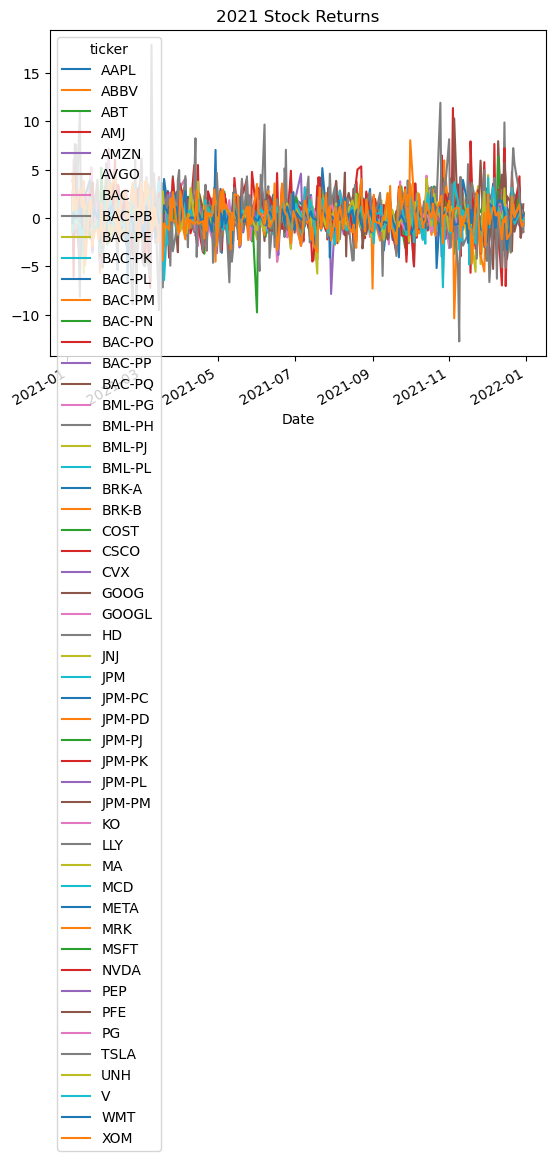

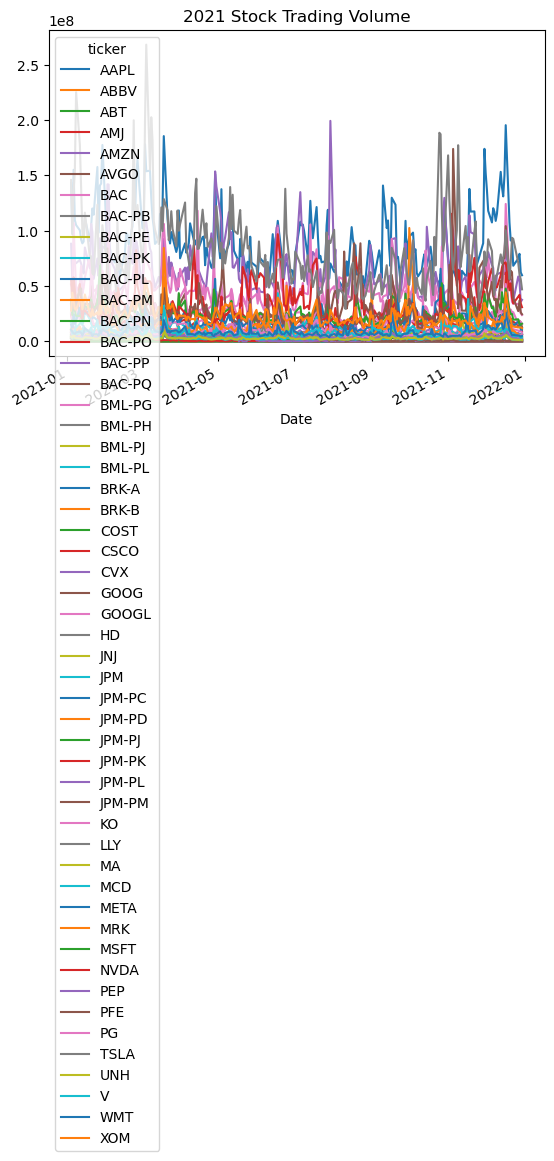

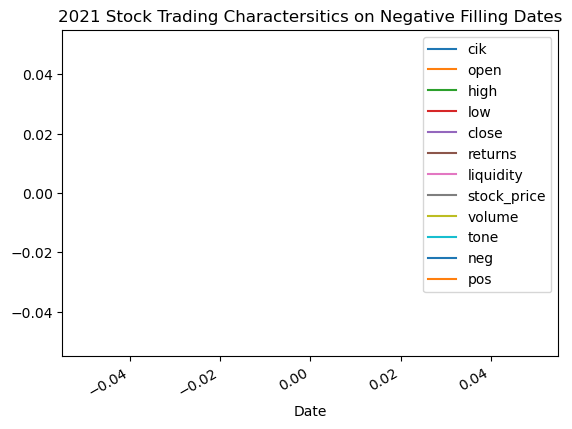

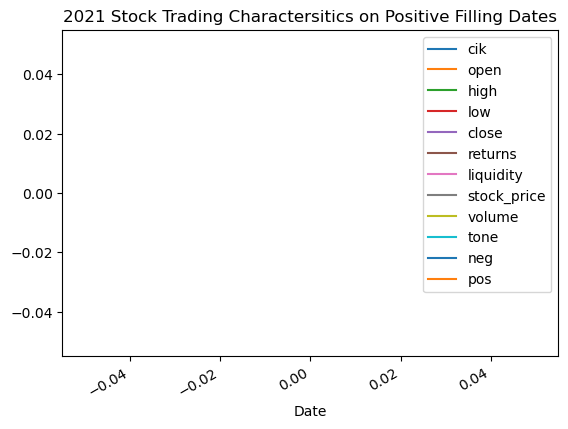

In [9]:
# All the information to do the summary statistics is in df_company_stock_filing_tone Dataframe

df_company_stockprices_returns = df_company_stockprices.pivot(columns = "ticker", values = "returns")
df_company_stockprices_volume = df_company_stockprices.pivot(columns = "ticker", values = "Volume")
returnssummarystat = df_company_stockprices_returns.describe()
volumesummarystat = df_company_stockprices_volume.describe()
print(returnssummarystat)
print(volumesummarystat)
df_company_stock_filing_tone_negative = df_company_stock_filing_tone.loc[df_company_stock_filing_tone['tone'] < 0]
df_company_stock_filing_tone_positive = df_company_stock_filing_tone.loc[df_company_stock_filing_tone['tone'] > 0]
negativesummarystat = df_company_stock_filing_tone_negative.describe()
positivesummarystat = df_company_stock_filing_tone_positive.describe()
print("Returns Summary Statistics for Positive Filing Dates")
print(positivesummarystat)
print("Returns Summary Statistics for Negative Filing Dates")
print(negativesummarystat)

# Plotting Graph
df_company_stockprices_returns.plot(kind = 'line',title = '2021 Stock Returns')
df_company_stockprices_volume.plot(kind = 'line', title = '2021 Stock Trading Volume')
df_company_stock_filing_tone_negative.plot(kind = 'line',title = '2021 Stock Trading Charactersitics on Negative Filling Dates')
df_company_stock_filing_tone_positive.plot(kind = 'line', title = '2021 Stock Trading Charactersitics on Positive Filling Dates')


# Economic procedure to examine the relationship between any of the stock characteristics and tone in 10-Q filings

In [10]:
import statsmodels.formula.api as smf

siglevel = 5/100
rm_rf_tickers = [{'cik':'', 'ticker':"^GSPC"},{'cik':'', 'ticker':"^IRX"}]

# Econometric procedure to show relationship between any of the stock characteristics(Returns) and tone in 10Q filing 
df_rm_rf_tickers = pd.DataFrame(rm_rf_tickers, columns = ['ticker'])

# Downloading stock prices for rm and rf using ticker
df_rm_rf_stockprices = pd.DataFrame()
for index, row in df_rm_rf_tickers.iterrows():
    yf.pdr_override()
    sym = row['ticker']
    df_onesymstockprices = yf.download(sym,stockprice_start_date, stockprice_end_date)
    df_onesymstockprices['ticker'] = sym
    df_onesymstockprices['returns'] = LogDiff(df_onesymstockprices['Adj Close'])
    df_rm_rf_stockprices = df_rm_rf_stockprices.append(df_onesymstockprices)

df_rm_rf_stockprices_returns = df_rm_rf_stockprices.pivot(columns = "ticker", values = "returns")
df_company_stock_filing_tone_rf_rm = df_company_stock_filing_tone.join(df_rm_rf_stockprices_returns, on = ['Date'], lsuffix = '', rsuffix = '_right')
df_company_stock_filing_tone_rf_rm.loc[df_company_stock_filing_tone_rf_rm["tone"] < 0, "tone_neg_dummy"] = 1

print("=====Starting Regression Analysis=====\n")

df_reg = pd.DataFrame()
ticker_result = []
intercept_result = []
intercept_conc = []
rf_result = []
rf_conc = []
tone_result = []
tone_conc = []
df_reg = pd.DataFrame({
                'returns' : df_company_stock_filing_tone_rf_rm['returns'],
                'rf' : df_company_stock_filing_tone_rf_rm['^IRX']/250,
                'rm' : df_company_stock_filing_tone_rf_rm['^GSPC'],
                'tone' : df_company_stock_filing_tone_rf_rm["tone_neg_dummy"]})
df_reg['rm_rf'] = df_reg['rm'] - df_reg['rf']
df_reg.fillna(0,inplace = True)

formula = 'returns ~ rm_rf + rf + tone'
results = smf.ols(formula, df_reg).fit()

print(results.summary())
print("=====Hypothesis Tests=====\n")

hypothesis01 = "Intercept=0"
hyp_res_01 = results.t_test(hypothesis01)
coef01 = hyp_res_01.effect
pv01 = hyp_res_01.pvalue
tv01 = hyp_res_01.tvalue
conc01 = "Reject H0. Intercept is statistically significant."
if(pv01 > siglevel):
    conc01 = "Do not Reject H0. Intercept is not statistically significant"
it_result = "Value = {}, PValue = {}, TValue = {}".format(coef01,pv01,tv01)
intercept_result.append(it_result)
intercept_conc.append(conc01)

print("====Intercept====")
print(it_result)

hypothesis02 = "rf=1"
hyp_res_02 = results.t_test(hypothesis02)
coef02 = hyp_res_02.effect
pv02 = hyp_res_02.pvalue
tv02 = hyp_res_02.tvalue
conc02 = "Reject H0. rf is statistically significant."
if(pv02 > siglevel):
    conc02 = "Do not Reject H0. rf is not statistically significant"
r_result = "Value = {}, PValue = {}, TValue = {}".format(coef02,pv02,tv02)
rf_result.append(r_result)
rf_conc.append(conc02)

print("====RF====")
print(r_result)

hypothesis03 = "tone=1"
hyp_res_03 = results.t_test(hypothesis03)
coef03 = hyp_res_03.effect
pv03 = hyp_res_03.pvalue
tv03 = hyp_res_03.tvalue
conc03 = "Reject H0. tone is statistically significant."
if(pv03 > siglevel):
    conc03 = "Do not Reject H0. tone is not statistically significant"
t_result = "Value = {}, PValue = {}, TValue = {}".format(coef03,pv03,tv03)
tone_result.append(t_result)
tone_conc.append(conc03)

print("====TONE====")
print(t_result)
print("\n\n")

df_reg_result = pd.DataFrame(intercept_result, columns = {"Intercept"}) 
df_reg_result['Intercept_Conclusion'] = intercept_conc    
df_reg_result['Rf'] = rf_result 
df_reg_result['Rf_Conclusion'] = rf_conc  
df_reg_result['Tone'] = tone_result 
df_reg_result['Tone_Conclusion'] = tone_conc  

print(df_reg_result)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3301502358.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rm_rf_stockprices = df_rm_rf_stockprices.append(df_onesymstockprices)



=====Starting Regression Analysis=====

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1194.
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:41:15   Log-Likelihood:                -20051.
No. Observations:               12556   AIC:                         4.011e+04
Df Residuals:                   12553   BIC:                         4.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

/var/folders/j5/_42xd4zd3mg_z3qdfvj11tjw0000gn/T/ipykernel_40656/3301502358.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rm_rf_stockprices = df_rm_rf_stockprices.append(df_onesymstockprices)
/Users/ayomikunadebawojo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
